# Single-Cell RNA-seq

In [1]:
import scanpy as sc

In [2]:
! ls

neuron_10k_v3_filtered_feature_bc_matrix.h5
week10-assignment8.ipynb


In [3]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## 1. Filtering by PCA

In [4]:
# using the scanpy documentation


sc.tl.pca(adata, n_comps=None, zero_center=True, svd_solver='arpack', random_state=0, return_info=False, use_highly_variable=None, dtype='float32', copy=False, chunked=False, chunk_size=None)


... storing 'feature_types' as categorical
... storing 'genome' as categorical


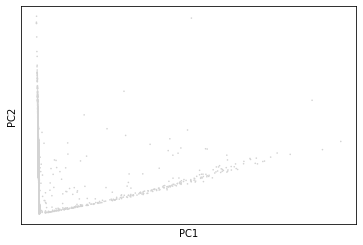

In [5]:
sc.pl.pca(adata)

In [6]:
filtering = sc.pp.recipe_zheng17(adata,copy=True)

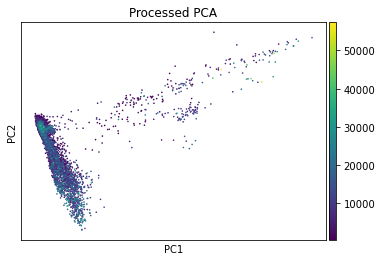

In [7]:
pca = sc.tl.pca(filtering,copy=True)
sc.pl.pca(pca,title="Processed PCA",color='n_counts_all')

## 2. Clustering
Use `leiden` clustering to identify clusters in the data. Produce t-SNE and UMAP plots showing the clusters

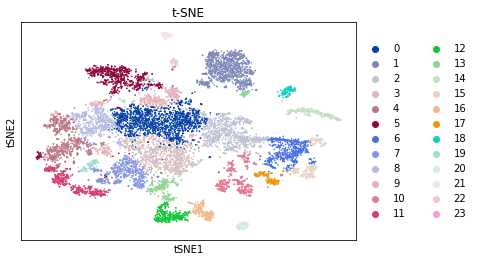

In [11]:
sc.pp.neighbors(pca)
sc.tl.leiden(pca)

#t-SNE analysis
sc.tl.tsne(pca)
sc.pl.tsne(pca, color='leiden', title='t-SNE')

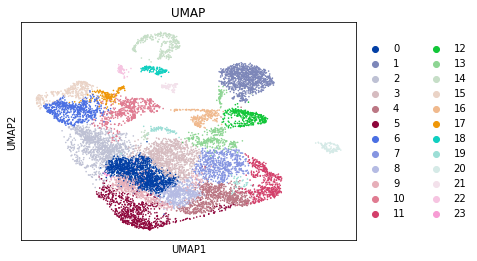

In [12]:
#UMAP plotting
sc.tl.umap(pca)
sc.pl.umap(pca,color='leiden', title='UMAP')

## 3: Distinguishing genes

Identify and plot genes that distinguish each cluster. Use both the t-test and logistic regression approaches, implemented through the `rank_genes_groups` function.

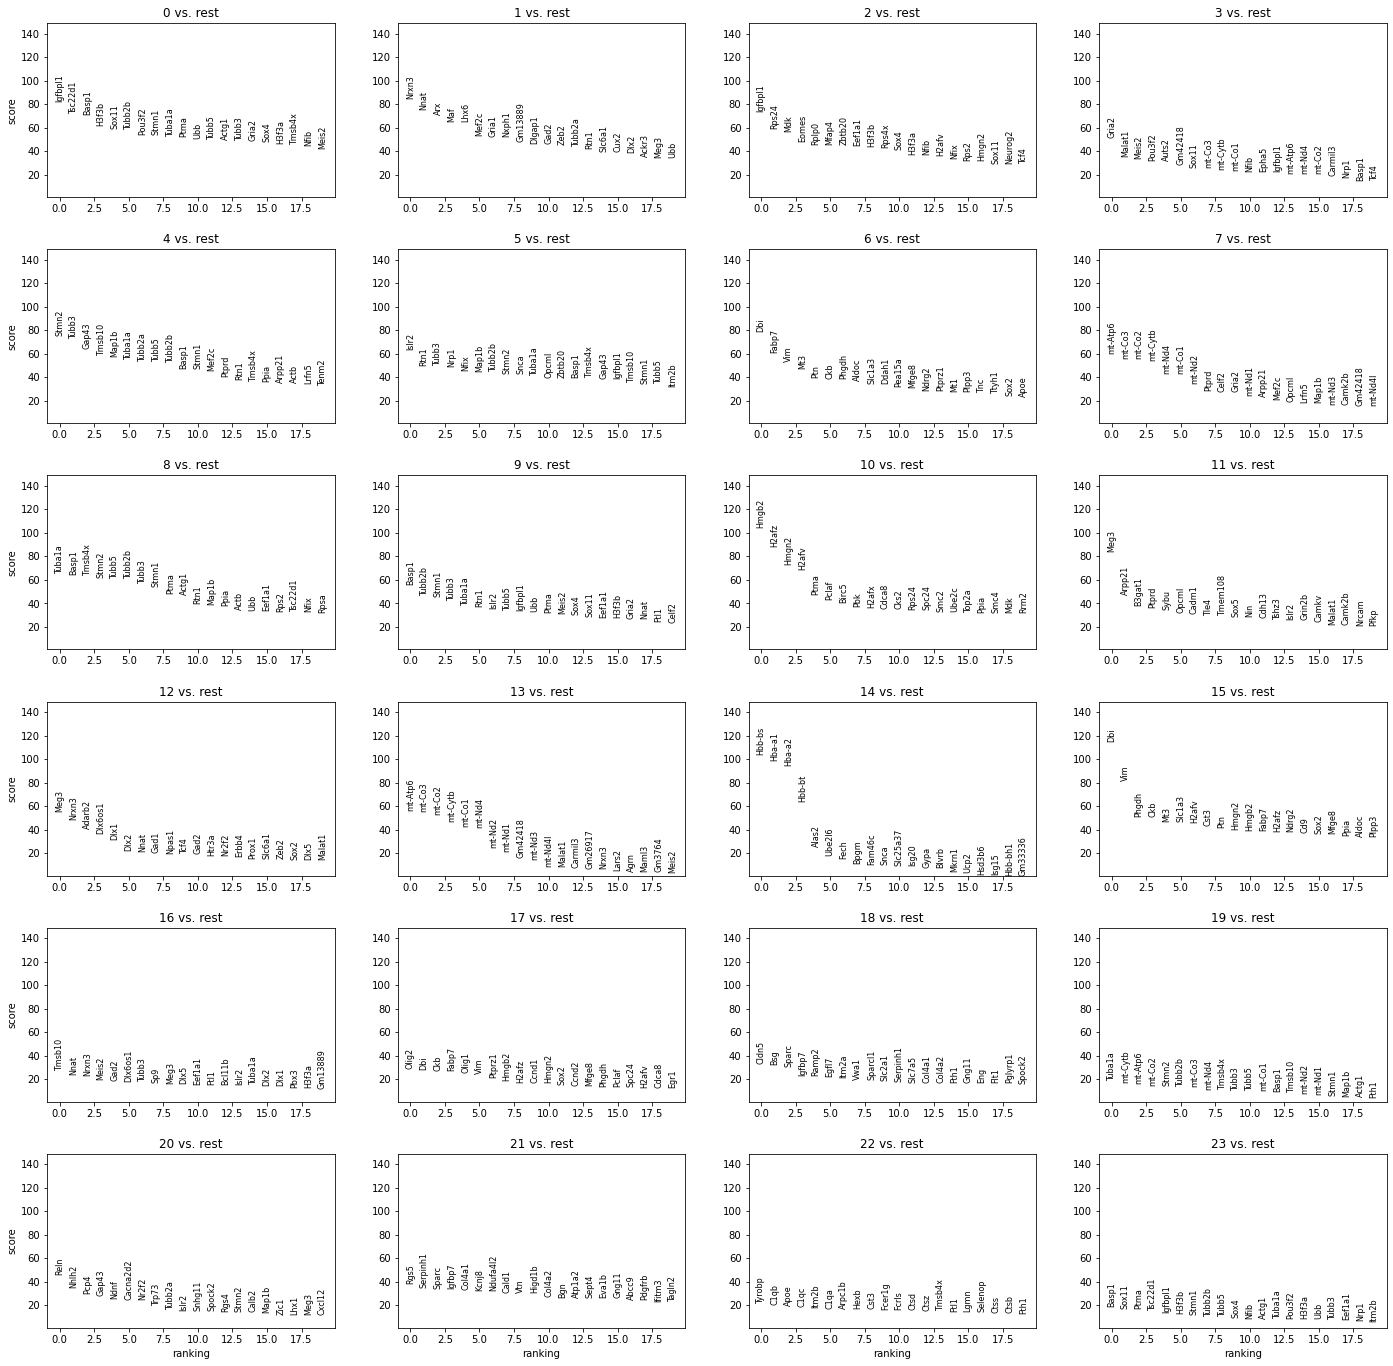

In [55]:
#groupby leiden is t_test by default
sc.tl.rank_genes_groups(pca, groupby = 'leiden')
sc.pl.rank_genes_groups(pca)

#use built-in function to write file identifying distinguishing genes
results_file = 'pca_results.h5ad'
pca.write(results_file)

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


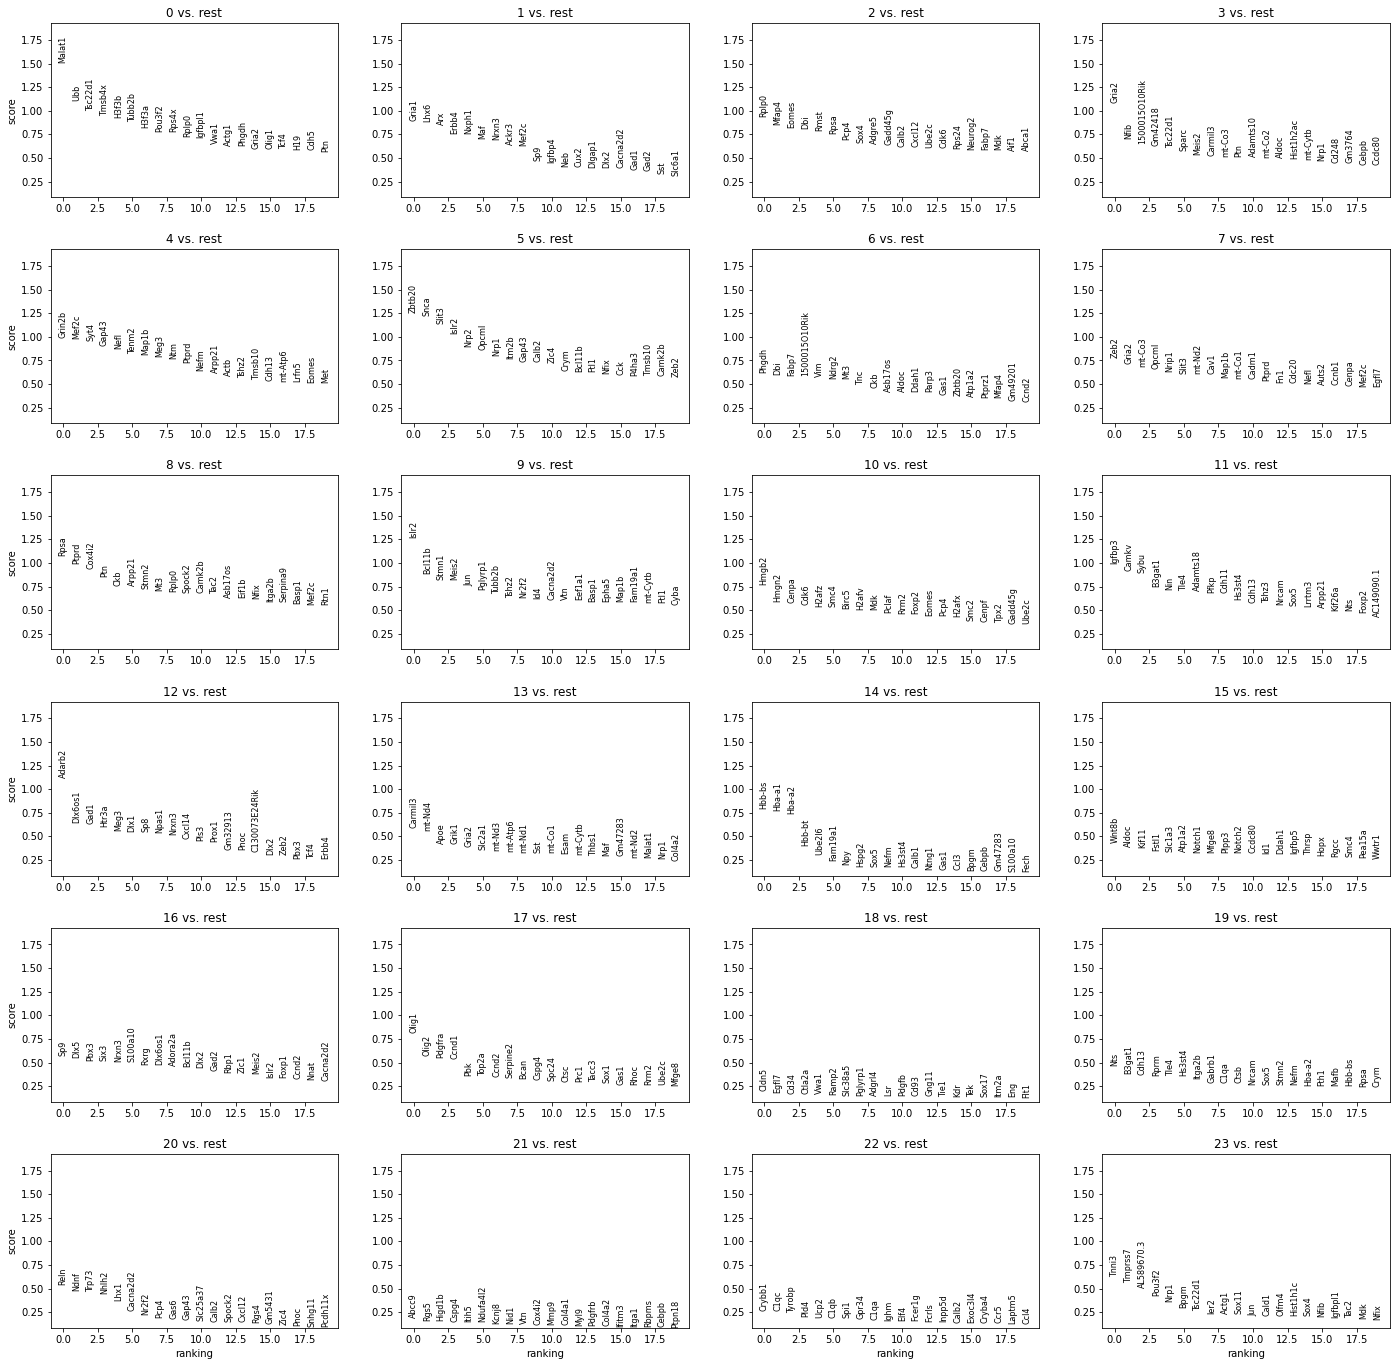

In [14]:
# rank groups by logistic regression
sc.tl.rank_genes_groups(pca, groupby = 'leiden', method='logreg')
sc.pl.rank_genes_groups(pca)

#identifying distinguishing genes by logreg
pca.write("clusteredgenes_logreg.txt")

## 4. Identify cell types

Using ***your knowledge***, identify some marker genes that should distinguish different brain cell types. You must identify at least 8 cell types.

You can color UMAP and t-SNE plots by any gene of your choice, which is helpful for visualizing which clusters are enriched for which genes, and which clusters might correspond to a specific brain cell type.
Alternatively, you can also produce dotplots and clustermaps that allow you to see how a specific set of genes are associated with your clusters. Also, stacked violin plots, etc…
Besides these support plots, make an overall t-SNE or UMAP plot that labels your clusters with the cell types you think they mostly represent. Make sure to provide the support plots you made in order to establish your labeling.

In [15]:
# hopefully this isn't cheating, but since all I know about brain cells is that they are in the brain
# I'm going to do this in reverse: see genes differentially expressed, and google cell type info

In [58]:
import pandas as pd

results = sc.read(results_file) #open data file written above to put into pandas df

df = pd.DataFrame(results.uns['rank_genes_groups']['names']).head(8)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Igfbpl1,Nrxn3,Igfbpl1,Gria2,Stmn2,Islr2,Dbi,mt-Atp6,Tuba1a,Basp1,...,Hbb-bs,Dbi,Tmsb10,Olig2,Cldn5,Tuba1a,Reln,Rgs5,Tyrobp,Basp1
1,Tsc22d1,Nnat,Rps24,Malat1,Tubb3,Rtn1,Fabp7,mt-Co3,Basp1,Tubb2b,...,Hba-a1,Vim,Nnat,Dbi,Bsg,mt-Cytb,Nhlh2,Serpinh1,C1qb,Sox11
2,Basp1,Arx,Mdk,Meis2,Gap43,Tubb3,Vim,mt-Co2,Tmsb4x,Stmn1,...,Hba-a2,Phgdh,Nrxn3,Ckb,Sparc,mt-Atp6,Pcp4,Sparc,Apoe,Ptma
3,H3f3b,Maf,Eomes,Pou3f2,Tmsb10,Nrp1,Mt3,mt-Cytb,Stmn2,Tubb3,...,Hbb-bt,Ckb,Meis2,Fabp7,Igfbp7,mt-Co2,Gap43,Igfbp7,C1qc,Tsc22d1
4,Sox11,Lhx6,Rplp0,Auts2,Map1b,Nfix,Ptn,mt-Nd4,Tubb5,Tuba1a,...,Alas2,Mt3,Gad2,Olig1,Ramp2,Stmn2,Ndnf,Col4a1,Itm2b,Igfbpl1
5,Tubb2b,Mef2c,Mfap4,Gm42418,Tuba1a,Map1b,Ckb,mt-Co1,Tubb2b,Rtn1,...,Ube2l6,Slc1a3,Dlx6os1,Vim,Egfl7,Tubb2b,Cacna2d2,Kcnj8,C1qa,H3f3b
6,Pou3f2,Gria1,Zbtb20,Sox11,Tubb2a,Tubb2b,Phgdh,mt-Nd2,Tubb3,Islr2,...,Fech,H2afv,Tubb3,Ptprz1,Itm2a,mt-Co3,Nr2f2,Ndufa4l2,Arpc1b,Stmn1
7,Stmn1,Nxph1,Eef1a1,mt-Co3,Tubb5,Stmn2,Aldoc,Ptprd,Stmn1,Tubb5,...,Bpgm,Cst3,Sp9,Hmgb2,Vwa1,mt-Nd4,Trp73,Cald1,Hexb,Tubb2b


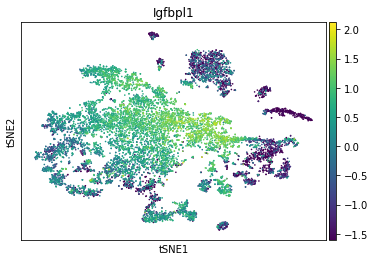

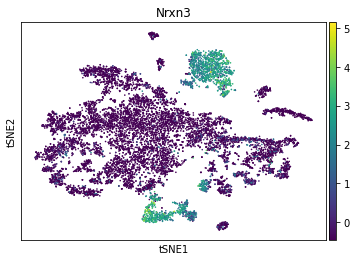

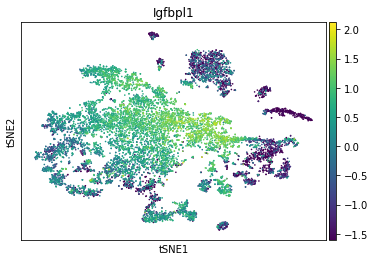

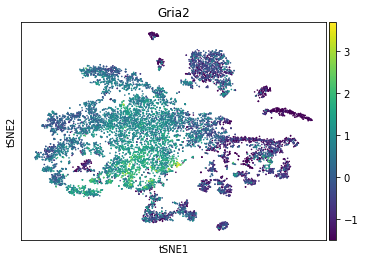

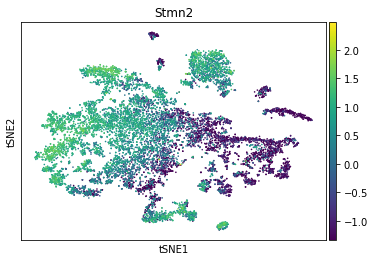

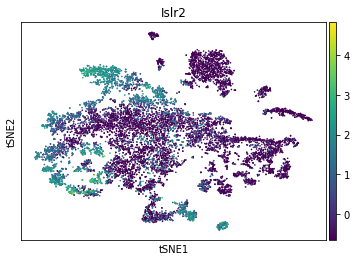

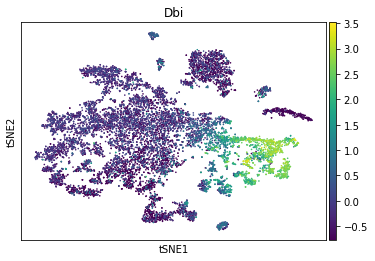

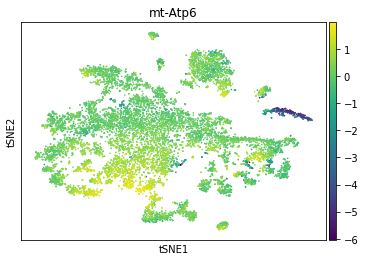

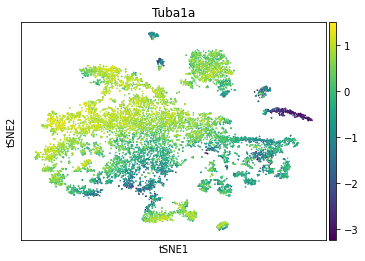

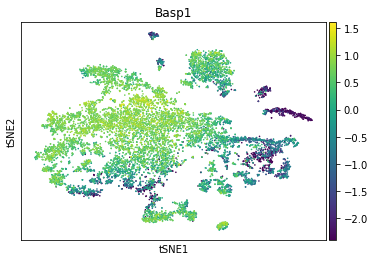

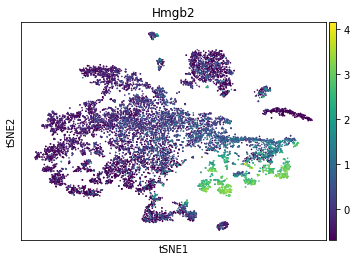

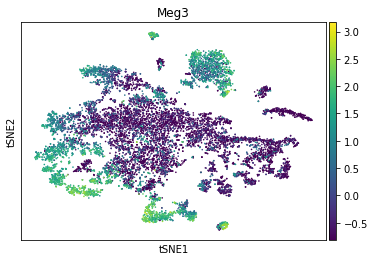

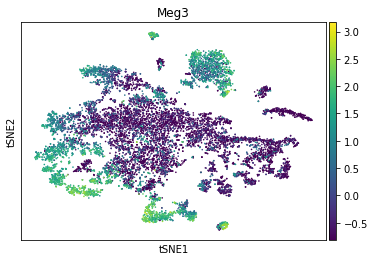

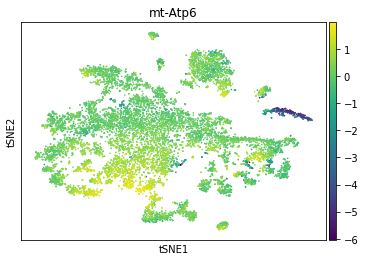

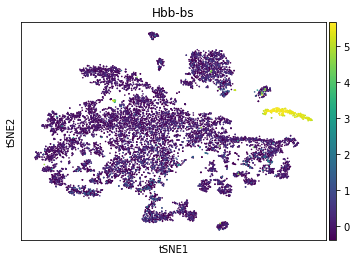

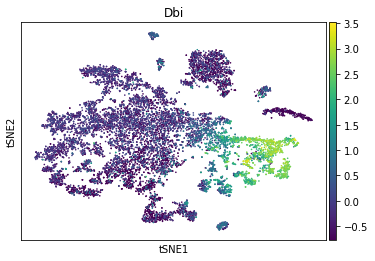

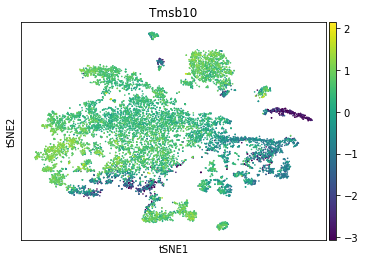

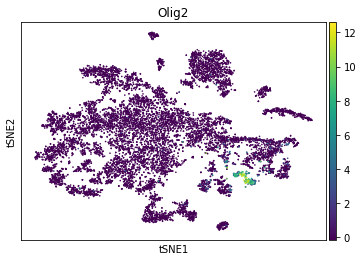

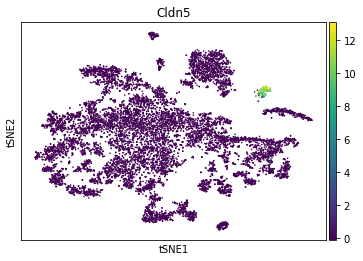

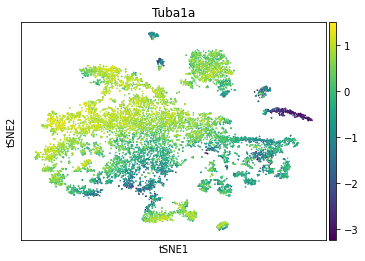

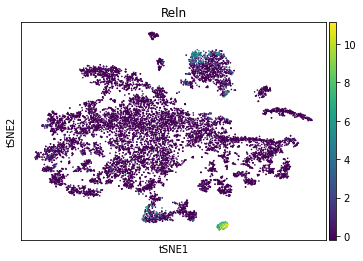

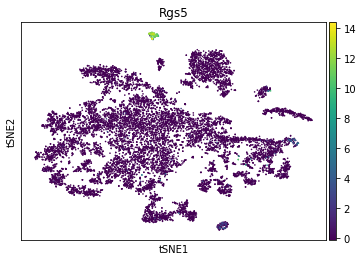

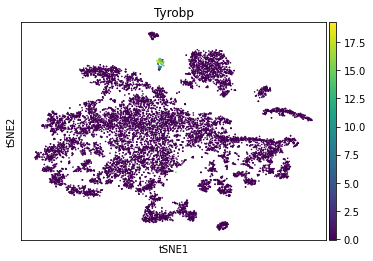

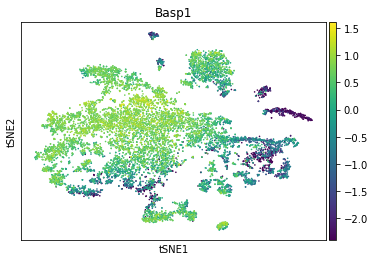

In [61]:
#make a list of 'random' genes
#yes I know this is a bit circular because I used the pca to generate a list of genes
#which I am now analyzing by pca, but I'm just taking one row
genes = df.iloc[0,:].tolist()

#and now run pca on the list. they look so cool!
for gene in genes:
    sc.pl.tsne(pca, color=gene, use_raw=False, title=gene)

In [65]:
# I looked up the 8 genes listed by PCA2 to see what cell types they are

# even though I know nothing about neuroscience, I'm pretty sure my characterizations make no sense
# and in retrospect I should have done this the other way, by looking up a list of brain cell types
# but it's the thought that counts, right?

marker_genes_dict = {'Axonemal': ['Igfbpl1'],
                     'Frontal Cortex': ['Tsc22d1'],
                     'Neural Progenitor Cells': ['Basp1'],
                     'Hippocampal': ['H3f3b'],
                     'Dendrites': ['Sox11'],
                     'Cortical Progenitors': ['Tubb2b'],
                     'Cerebral Cortex': ['Pou3f2'],
                     'Motor Neurons': ['Stmn1'],}


categories: 0, 1, 2, etc.
var_group_labels: Axonemal, Frontal Cortex, Neural Progenitor Cells, etc.


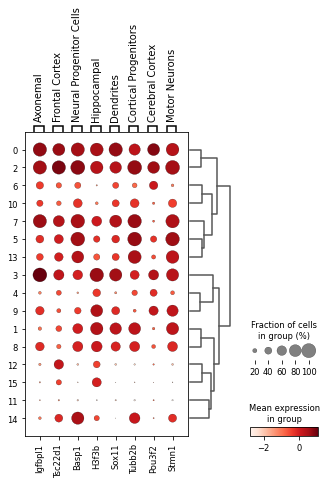

In [67]:
sc.tl.leiden(pca, key_added='clusters', resolution=0.5)
sc.pl.dotplot(pca, marker_genes_dict, 'clusters', dendrogram=True)

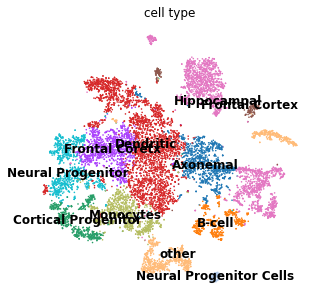

In [73]:
# a final clustering map based on reverse-clustering the dot plot above, as in the scanpy tutorial...
# ...but they don't actually cluster, so it's a bit of a hash
cluster2annotation = {
     '0': 'Dendritic',
     '1': 'Hippocampal',
     '2': 'Frontal Coretx',
     '3': 'Axonemal',
     '4': 'Hippocampal',
     '5': 'Neural Progenitor',
     '6': 'Monocytes',
     '7': 'Dendritic',
     '8': 'other',
     '9': 'B-cell',
     '10': 'Cortical Progenitor',
     '11': 'other',
     '12': 'Frontal Cortex',
     '13': 'Cortical Progenitor',
     '14': 'Neural Progenitor Cells',
     '15': 'Hippocampal',
}


pca.obs['cell type'] = pca.obs['clusters'].map(cluster2annotation).astype('category')
sc.pl.tsne(pca, color='cell type', legend_loc='on data', frameon=False, legend_fontsize=12, size = 10)